In [48]:
pip install h5py

In [0]:
import tensorflow as tf
import h5py
import numpy as np
from sklearn.metrics import accuracy_score,classification_report
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
f = h5py.File('/content/drive/My Drive/AIML PG/Introduction_to_Neural_Networks_and_Deep_Learning_R7_INN_Project2/SVHN_single_grey1.h5')

In [5]:
list(f.keys())

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

In [6]:
print(f['X_train'].shape)
print(f['X_val'].shape)
print(f['X_test'].shape)
print(f['y_train'].shape)
print(f['y_test'].shape)
print(f['y_val'].shape)

(42000, 32, 32)
(60000, 32, 32)
(18000, 32, 32)
(42000,)
(18000,)
(60000,)


2

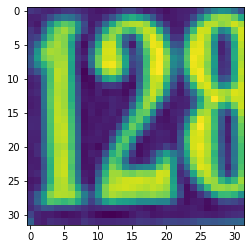

In [7]:
plt.imshow(f['X_train'][0])
f['y_train'][0]

In [0]:
X_train = np.array(f['X_train'])
X_test = np.array(f['X_test'])
X_val = np.array(f['X_val'])
y_val = tf.keras.utils.to_categorical(y=f['y_val'],num_classes=10)
y_train = tf.keras.utils.to_categorical(y=f['y_train'],num_classes=10)

X_train = X_train/255
X_test = X_test/255
X_val = X_val/255

In [9]:
X_train_knn = X_train.reshape((X_train.shape[0],(X_train.shape[1]*X_train.shape[2])))
X_test_knn = X_test.reshape((X_test.shape[0],(X_test.shape[1]*X_test.shape[2])))
print(X_train_knn.shape)
print(X_test_knn.shape)

(42000, 1024)
(18000, 1024)


In [10]:
#Implementing KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_knn,f['y_train'])
knn_model.score(X_test_knn,f['y_test'])

0.49016666666666664

K nearest neighbor gives the precision score of 49%

In [18]:
print(classification_report(y_true=f['y_test'],y_pred=knn_model.predict(X_test_knn)))

              precision    recall  f1-score   support

           0       0.38      0.66      0.48      1814
           1       0.44      0.70      0.54      1828
           2       0.55      0.52      0.53      1803
           3       0.42      0.39      0.41      1719
           4       0.67      0.61      0.64      1812
           5       0.48      0.36      0.41      1768
           6       0.47      0.38      0.42      1832
           7       0.72      0.58      0.64      1808
           8       0.42      0.33      0.37      1812
           9       0.52      0.36      0.43      1804

    accuracy                           0.49     18000
   macro avg       0.51      0.49      0.49     18000
weighted avg       0.51      0.49      0.49     18000



In [0]:
tf.keras.backend.clear_session()

In [12]:
#implementing Deep Neural Network
model = tf.keras.Sequential()
model.add(tf.keras.layers.Reshape(target_shape=(1024,),input_shape=(32,32)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(units=500,activation = 'relu'))
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(units=50,activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(units=10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='SGD',metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 1024)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
dense (Dense)                (None, 500)               512500    
_________________________________________________________________
dropout (Dropout)            (None, 500)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 500)               2000      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                25050     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0

In [14]:
model.fit(x=X_train,y=y_train,epochs=25,validation_data=(X_val,y_val),batch_size=32)

Train on 42000 samples, validate on 60000 samples
Epoch 1/25
42000/42000 [==============================] - 16s 375us/sample - loss: 1.9866 - acc: 0.3191 - val_loss: 1.2942 - val_acc: 0.6337
Epoch 2/25
42000/42000 [==============================] - 15s 351us/sample - loss: 1.4642 - acc: 0.5165 - val_loss: 1.0277 - val_acc: 0.7097
Epoch 3/25
42000/42000 [==============================] - 15s 353us/sample - loss: 1.2983 - acc: 0.5774 - val_loss: 0.9227 - val_acc: 0.7306
Epoch 4/25
42000/42000 [==============================] - 15s 352us/sample - loss: 1.1991 - acc: 0.6139 - val_loss: 0.8360 - val_acc: 0.7600
Epoch 5/25
42000/42000 [==============================] - 15s 356us/sample - loss: 1.1329 - acc: 0.6332 - val_loss: 0.7746 - val_acc: 0.7812
Epoch 6/25
42000/42000 [==============================] - 16s 376us/sample - loss: 1.0783 - acc: 0.6571 - val_loss: 0.7216 - val_acc: 0.7931
Epoch 7/25
42000/42000 [==============================] - 15s 355us/sample - loss: 1.0325 - acc: 0.6679 

In [15]:
accuracy_score(y_true=f['y_test'],y_pred=model.predict_classes(X_test))

0.8343888888888888

In [19]:
print(classification_report(y_true=f['y_test'],y_pred=model.predict_classes(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1814
           1       0.85      0.85      0.85      1828
           2       0.87      0.86      0.87      1803
           3       0.72      0.76      0.74      1719
           4       0.88      0.88      0.88      1812
           5       0.82      0.82      0.82      1768
           6       0.82      0.82      0.82      1832
           7       0.87      0.88      0.87      1808
           8       0.87      0.75      0.81      1812
           9       0.83      0.83      0.83      1804

    accuracy                           0.83     18000
   macro avg       0.84      0.83      0.83     18000
weighted avg       0.84      0.83      0.83     18000



In [0]:
#Let's build another model with 'adam' optimiser
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Reshape(target_shape=(1024,),input_shape=(32,32)))
model2.add(tf.keras.layers.BatchNormalization())
model2.add(tf.keras.layers.Dense(units=500,activation = 'relu'))
model2.add(tf.keras.layers.Dropout(rate=0.2))
model2.add(tf.keras.layers.BatchNormalization())
model2.add(tf.keras.layers.Dense(units=50,activation='relu'))
model2.add(tf.keras.layers.Dropout(rate=0.2))
model2.add(tf.keras.layers.BatchNormalization())
model2.add(tf.keras.layers.Dense(units=10,activation='softmax'))
model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [21]:
model2.fit(x=X_train,y=y_train,epochs=25,validation_data=(X_val,y_val),batch_size=32)

Train on 42000 samples, validate on 60000 samples
Epoch 1/25
42000/42000 [==============================] - 18s 437us/sample - loss: 1.7134 - acc: 0.4232 - val_loss: 1.1035 - val_acc: 0.6761
Epoch 2/25
42000/42000 [==============================] - 17s 406us/sample - loss: 1.2885 - acc: 0.5859 - val_loss: 0.9456 - val_acc: 0.7203
Epoch 3/25
42000/42000 [==============================] - 17s 397us/sample - loss: 1.1592 - acc: 0.6304 - val_loss: 0.8410 - val_acc: 0.7576
Epoch 4/25
42000/42000 [==============================] - 17s 397us/sample - loss: 1.0791 - acc: 0.6555 - val_loss: 0.7486 - val_acc: 0.7868
Epoch 5/25
42000/42000 [==============================] - 17s 399us/sample - loss: 1.0137 - acc: 0.6800 - val_loss: 0.6958 - val_acc: 0.8029
Epoch 6/25
42000/42000 [==============================] - 17s 405us/sample - loss: 0.9633 - acc: 0.6957 - val_loss: 0.6633 - val_acc: 0.8110
Epoch 7/25
42000/42000 [==============================] - 17s 406us/sample - loss: 0.9207 - acc: 0.7098 

In [23]:
accuracy_score(y_true=f['y_test'],y_pred=model2.predict_classes(X_test))

0.8543888888888889

In [24]:
print(classification_report(y_true=f['y_test'],y_pred=model2.predict_classes(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1814
           1       0.83      0.87      0.85      1828
           2       0.89      0.85      0.87      1803
           3       0.83      0.80      0.82      1719
           4       0.89      0.87      0.88      1812
           5       0.85      0.85      0.85      1768
           6       0.89      0.83      0.86      1832
           7       0.84      0.91      0.87      1808
           8       0.90      0.78      0.83      1812
           9       0.82      0.86      0.84      1804

    accuracy                           0.85     18000
   macro avg       0.86      0.85      0.85     18000
weighted avg       0.86      0.85      0.85     18000



Trade off between KNN and Deep neural networks

1. KNN models are simple and easy to construct as compared to Deep Neural networks.
2. KNN models however produce very poor precesion as compared to Neural networks.
3. KNN models are very slow when applied on image data, Neural networks are quite faster models on image data.
4. The added complexity in neural netwoks results in good accuracy on complex data like image.